### Module 6: Introduction to Random Forest Regression

The random forest algorithm an **ensemble** , supervised learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. <P>

When predicting new values, the algorithm uses these many decision trees and at the end of many predictions, it takes their average. This is what classifies it as an ensemble method; it uses many models to make predictions.<P>
 
Random forests are frequently used as "blackbox" models in businesses, as they generate reasonable predictions across a wide range of data while requiring little configuration. 

<img src="images/rf.png" alt="Random Forest" style="width: 600px;"/>

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor # Here is the RF regressor
from sklearn.metrics import r2_score,mean_squared_error  # Use our past metrics
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Load the Boston housing dataset.
#     https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
data = datasets.load_boston() # loads Boston dataset from datasets library 
# Load all the possible features
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


### Isolate the target variable

In [4]:
# The Target will be the median value "MEDV" in thousands of dollars
y = pd.DataFrame(data.target, columns=["MEDV"])
y.head(3)

,MEDV
0,24.0
1,21.6
2,34.7


### Isolate the features matrix

In [5]:
# Decide which features to include
print('Possible Features:\n',list(df.columns))
# Lets drop 'B'
X = df.drop(['B'], axis = 1)
print('\nSelected Features:\n',list(X.columns))
X.head(2)

Possible Features:
 ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

Selected Features:
 ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14


### Split the data into training and test sets

In [6]:
# Split into train/test
# Reserve 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
# Verify the sizes of the split datasets
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (404, 12)
y_train: (404, 1)
X_test: (102, 12)
y_test: (102, 1)


### Create Random Forest model and train it

In [20]:
# Create the RF regressor object
# This algorithm is from the sklearn.ensemble module
rfr = RandomForestRegressor(max_depth = 4, n_estimators = 100) # very simple start
#
# Train the model using the training data
fit_rfr = rfr.fit(X_train, y_train)
#
# Discuss warning message and how to remove it: 
# Method 1: y_train.values.ravel() - 1 row of values
#   https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected
# Method 2: y_train.T.values[0] -  also 1 row of values
#
# Read about RF regressor hyperparameters here:
#    https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
fit_rfr # Show hyperparameters

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Investigate the trees in the forest

In [15]:
# We trained it with 10 trees, each at a max_depth of 2
print('Number of total trees:',len(rfr.estimators_))
# Let's look at a couple of them and notice the difference
for tree in rfr.estimators_[5:7]: # Show only #6 & #7
    print(tree)

Number of total trees: 10
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1155693669, splitter='best')
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=170219936, splitter='best')


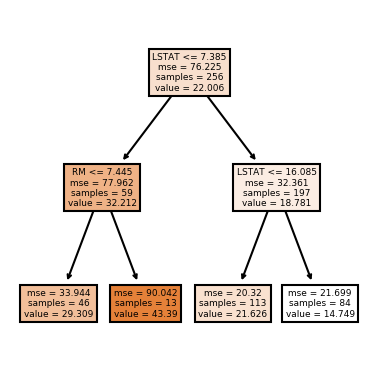

In [16]:
# Visualize tree #6  using a function from the sklearn.tree module
tree_6 = rfr.estimators_[5]
plt.figure(figsize=(3,3), dpi=150)
from sklearn import tree # We need the tree module to do this
tree.plot_tree(tree_6, feature_names=X.columns,filled=True)
plt.show()

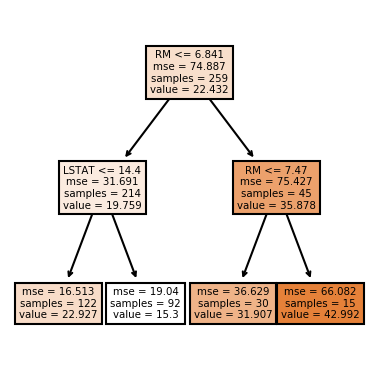

In [10]:
# Visualize tree #7  using a function from the sklearn.tree module
tree_7 = rfr.estimators_[6]
plt.figure(figsize=(3,3), dpi=150)
tree.plot_tree(tree_7, feature_names=X.columns,filled=True)
plt.show()

### Use the random forest regressor to predict values for the test set

In [21]:
# Predict new MEDV values using the X_test data
y_pred = rfr.predict(X_test)

### Evaluate the performance of RF regressor


In [22]:
# Calculate the metrics
#
r2 = round(r2_score(y_test, y_pred),2)
mse = round(mean_squared_error(y_test, y_pred),2)
#
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
print("MSE: ", mse)
print("RMSE: ", round(mse**(1/2.0),3)) # Root Mean Squared Error

Coefficient of determination: 0.83
MSE:  13.96
RMSE:  3.736


### Predict new values

In [19]:
print(list(X.columns))
# Define house features
h1 = [18.811, 0.0, 18.1, 0.0, 0.597, 4.628, 100.0, 1.5539, 24.0, 666.0, 20.2, 34.37]
h2 = [5.66998, 0.0, 18.1, 1.0, 0.631, 6.683, 96.8, 1.3567, 24.0, 666.0, 20.2, 3.73]
h3 = [7.99248, 0.0, 18.1, 0.0, 0.7, 5.52, 100.0, 1.5331, 24.0, 666.0, 20.2, 24.56]
h4 = [0.30347, 0.0, 7.38, 0.0, 0.493, 6.312, 28.9, 5.4159, 5.0, 287.0, 19.6, 6.15]
h5 = [0.15086, 0.0, 27.74, 0.0, 0.609, 5.454, 92.7, 1.8209, 4.0, 711.0, 20.1, 18.06]
#
h_lst = [h1, h2, h3, h4, h5]
#
for house in h_lst:
    print('House features:', house)
    df = pd.DataFrame(data=house)
    pv = round(rfr.predict(df.T).item(),3) # Watch out for the form of input to the predictor
    print('Predicted Value in thousands of dollars:', pv , '\n')

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
House features: [18.811, 0.0, 18.1, 0.0, 0.597, 4.628, 100.0, 1.5539, 24.0, 666.0, 20.2, 34.37]
Predicted Value in thousands of dollars: 15.019 

House features: [5.66998, 0.0, 18.1, 1.0, 0.631, 6.683, 96.8, 1.3567, 24.0, 666.0, 20.2, 3.73]
Predicted Value in thousands of dollars: 23.959 

House features: [7.99248, 0.0, 18.1, 0.0, 0.7, 5.52, 100.0, 1.5331, 24.0, 666.0, 20.2, 24.56]
Predicted Value in thousands of dollars: 15.019 

House features: [0.30347, 0.0, 7.38, 0.0, 0.493, 6.312, 28.9, 5.4159, 5.0, 287.0, 19.6, 6.15]
Predicted Value in thousands of dollars: 23.959 

House features: [0.15086, 0.0, 27.74, 0.0, 0.609, 5.454, 92.7, 1.8209, 4.0, 711.0, 20.1, 18.06]
Predicted Value in thousands of dollars: 15.019 

